In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
X = torch.arange(0, 10, 0.2)

In [3]:
# lineal y(x) = m * x + a
# cuadrado y(x) = m * (x ^ 2) + n * x + a

In [4]:
m, n, a = 0.9, 0.6, 0.5

In [5]:
def f(x):
    return torch.pow(x, 2) * m + x * n + a

In [6]:
X = X.unsqueeze(dim=1)
X

tensor([[0.0000],
        [0.2000],
        [0.4000],
        [0.6000],
        [0.8000],
        [1.0000],
        [1.2000],
        [1.4000],
        [1.6000],
        [1.8000],
        [2.0000],
        [2.2000],
        [2.4000],
        [2.6000],
        [2.8000],
        [3.0000],
        [3.2000],
        [3.4000],
        [3.6000],
        [3.8000],
        [4.0000],
        [4.2000],
        [4.4000],
        [4.6000],
        [4.8000],
        [5.0000],
        [5.2000],
        [5.4000],
        [5.6000],
        [5.8000],
        [6.0000],
        [6.2000],
        [6.4000],
        [6.6000],
        [6.8000],
        [7.0000],
        [7.2000],
        [7.4000],
        [7.6000],
        [7.8000],
        [8.0000],
        [8.2000],
        [8.4000],
        [8.6000],
        [8.8000],
        [9.0000],
        [9.2000],
        [9.4000],
        [9.6000],
        [9.8000]])

In [7]:
y = f(X)
y

tensor([[ 0.5000],
        [ 0.6560],
        [ 0.8840],
        [ 1.1840],
        [ 1.5560],
        [ 2.0000],
        [ 2.5160],
        [ 3.1040],
        [ 3.7640],
        [ 4.4960],
        [ 5.3000],
        [ 6.1760],
        [ 7.1240],
        [ 8.1440],
        [ 9.2360],
        [10.4000],
        [11.6360],
        [12.9440],
        [14.3240],
        [15.7760],
        [17.3000],
        [18.8960],
        [20.5640],
        [22.3040],
        [24.1160],
        [26.0000],
        [27.9560],
        [29.9840],
        [32.0840],
        [34.2560],
        [36.5000],
        [38.8160],
        [41.2040],
        [43.6640],
        [46.1960],
        [48.8000],
        [51.4760],
        [54.2240],
        [57.0440],
        [59.9360],
        [62.9000],
        [65.9360],
        [69.0440],
        [72.2240],
        [75.4760],
        [78.8000],
        [82.1960],
        [85.6640],
        [89.2040],
        [92.8160]])

In [8]:
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]))

In [10]:
class CuadraticRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.m = nn.Parameter(torch.randn(1))
        self.n = nn.Parameter(torch.randn(1))
        self.a = nn.Parameter(torch.randn(1))
    
    def forward(self, x):
        return torch.pow(x, 2) * self.m + x * self.n + self.a

In [11]:
def plot_pred(y_pred=None):
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(X_train, y_train, s=4, color='blue', label='Entrenamiento')
    ax.scatter(X_test, y_test, s=4, color='green', label='Test')
    
    if y_pred is not None:
        ax.scatter(X_test, y_pred, s=4, color='red', label='Predicciones')
        
    ax.legend(prop={'size': 15})

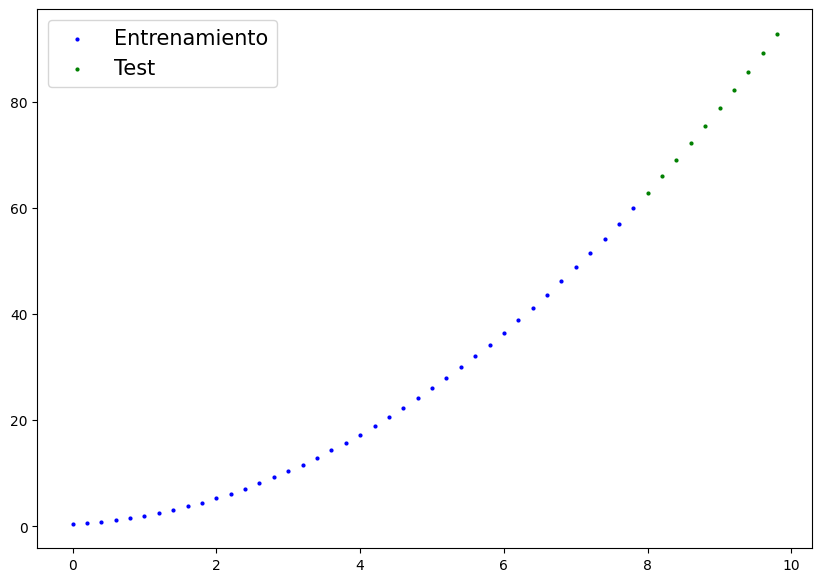

In [12]:
plot_pred()

In [13]:
model = CuadraticRegressionModel()

with torch.inference_mode():
    y_pred = model(X_test)
y_pred

tensor([[31.2465],
        [32.9657],
        [34.7313],
        [36.5432],
        [38.4014],
        [40.3059],
        [42.2567],
        [44.2539],
        [46.2974],
        [48.3873]])

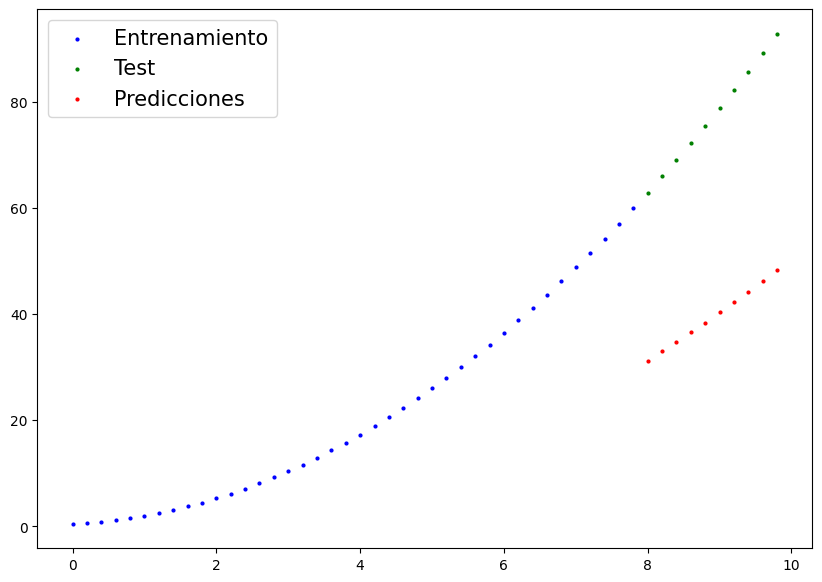

In [14]:
plot_pred(y_pred)

In [15]:
model.state_dict()

OrderedDict([('m', tensor([0.5791])),
             ('n', tensor([-0.7852])),
             ('a', tensor([0.4661]))])

In [16]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.001)

In [17]:
epochs = 1000
for epoch in range(epochs):
    model.train()
    y_pred_step = model(X_train)
    loss = loss_fn(y_pred_step, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model.eval()
    if epoch % 10 == 0:
        with torch.inference_mode():
            print(f"Epoch {epoch}, loss: {loss}")
            print(model.state_dict())
    

Epoch 0, loss: 227.58047485351562
OrderedDict([('m', tensor([1.4110])), ('n', tensor([-0.6499])), ('a', tensor([0.4902]))])
Epoch 10, loss: 2.075279951095581
OrderedDict([('m', tensor([1.1020])), ('n', tensor([-0.6658])), ('a', tensor([0.4986]))])
Epoch 20, loss: 1.9448715448379517
OrderedDict([('m', tensor([1.0954])), ('n', tensor([-0.6348])), ('a', tensor([0.5146]))])
Epoch 30, loss: 1.826139211654663
OrderedDict([('m', tensor([1.0902])), ('n', tensor([-0.6046])), ('a', tensor([0.5302]))])
Epoch 40, loss: 1.714778184890747
OrderedDict([('m', tensor([1.0851])), ('n', tensor([-0.5753])), ('a', tensor([0.5452]))])
Epoch 50, loss: 1.610329031944275
OrderedDict([('m', tensor([1.0802])), ('n', tensor([-0.5470])), ('a', tensor([0.5597]))])
Epoch 60, loss: 1.512363076210022
OrderedDict([('m', tensor([1.0755])), ('n', tensor([-0.5195])), ('a', tensor([0.5737]))])
Epoch 70, loss: 1.4204744100570679
OrderedDict([('m', tensor([1.0709])), ('n', tensor([-0.4928])), ('a', tensor([0.5872]))])
Epoch 

In [18]:
m, n, a

(0.9, 0.6, 0.5)

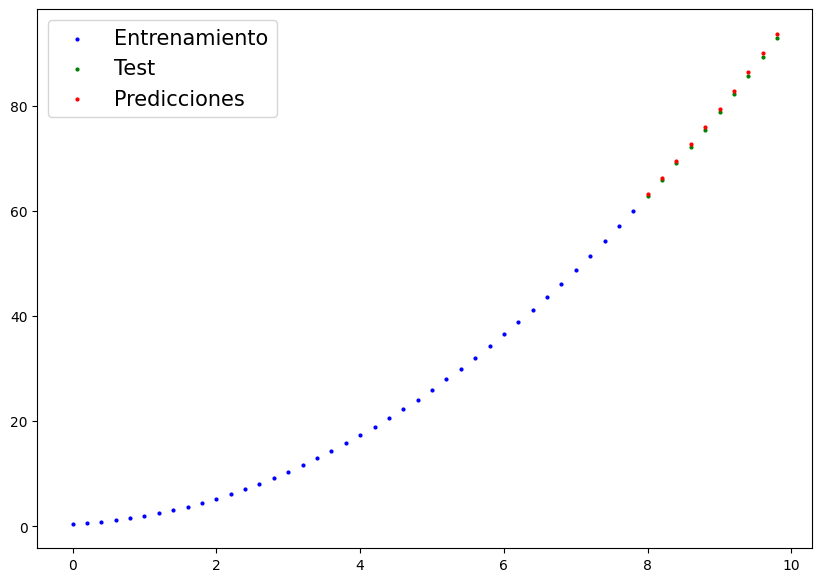

In [19]:
model.eval()
with torch.inference_mode():
    y_pred_final = model(X_test)
plot_pred(y_pred_final)

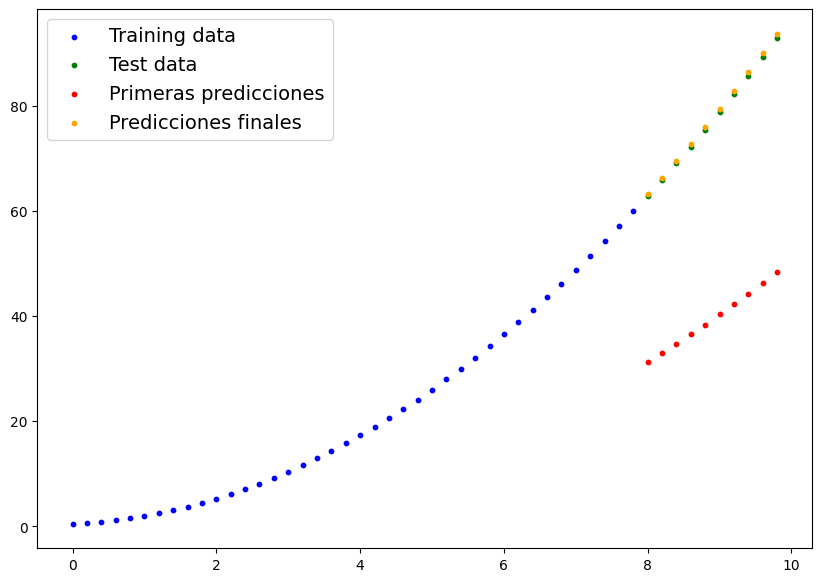

In [20]:
fix, ax = plt.subplots(figsize=(10, 7))

ax.scatter(X_train, y_train, s=10, color='blue', label='Training data')
ax.scatter(X_test, y_test, s=10, color='green', label='Test data')
ax.scatter(X_test, y_pred, s=10, color='red', label='Primeras predicciones')
ax.scatter(X_test, y_pred_final, s=10, color='orange', label='Predicciones finales')
ax.legend(prop={'size': 14})